<a href="https://colab.research.google.com/github/nazish-05/Gym-Webpage/blob/main/TNT0204_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = ("/content/drive/MyDrive/diabetes_prediction_dataset.csv")
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [ ]:
df.shape

(100000, 9)

In [ ]:
# Check for duplicate values
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(3854)

In [ ]:
df["diabetes"].value_counts()

,count
diabetes,
0,91500
1,8500


In [ ]:
print(df[df.duplicated()].groupby("diabetes").size())


diabetes
0    3836
1      18
dtype: int64


In [ ]:
df = df.drop_duplicates()


In [ ]:
# Summary statistics of numerical columns
summary_stats = df.describe()
summary_stats

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Count of each category in 'diabetes' column (target variable)
target_distribution = df["diabetes"].value_counts(normalize=True) * 100
target_distribution

,proportion
diabetes,
0,91.178
1,8.822


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# EDA

<ipython-input-13-9bc4cbb5b507>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["diabetes"], palette="viridis")


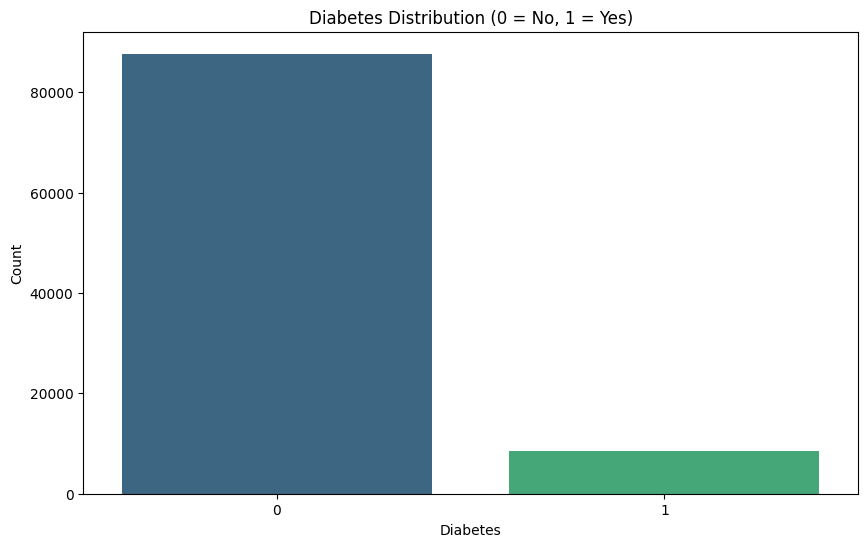

In [ ]:
#Target Variable Distribution (Bar Plot)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df["diabetes"], palette="viridis")
ax.set_title("Diabetes Distribution (0 = No, 1 = Yes)")
ax.set_xlabel("Diabetes")
ax.set_ylabel("Count")
plt.grid(False)
plt.show()

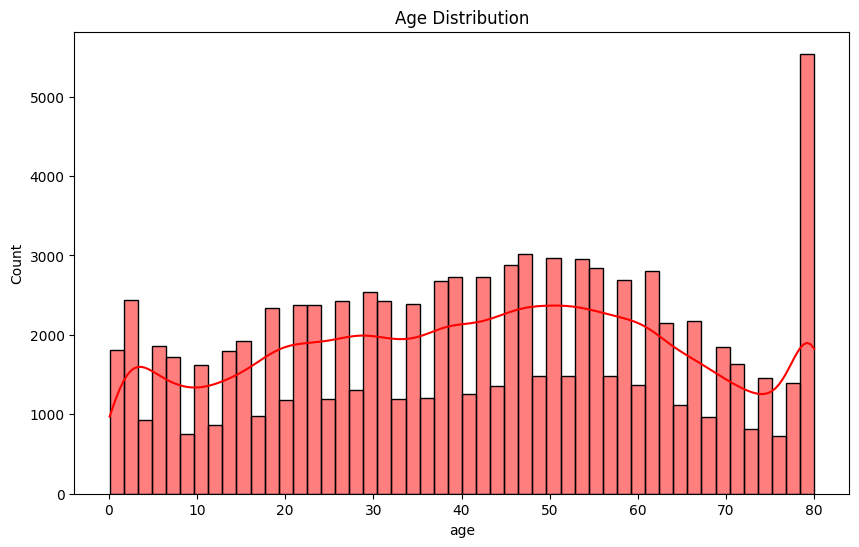

In [ ]:
# Age Distribution (Histogram)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df["age"], bins=50, kde=True, color="Red")
ax.set_title("Age Distribution")
plt.grid(False)
plt.show()

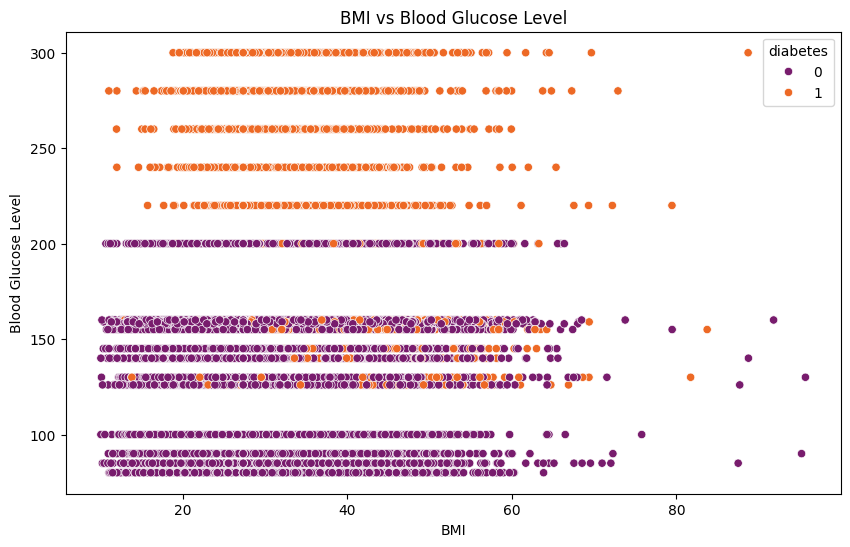

In [ ]:
# Scatter plot of BMI vs Blood Glucose Level

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["blood_glucose_level"], hue=df["diabetes"], palette="inferno")
plt.title("BMI vs Blood Glucose Level")
plt.xlabel("BMI")
plt.ylabel("Blood Glucose Level")
plt.show()


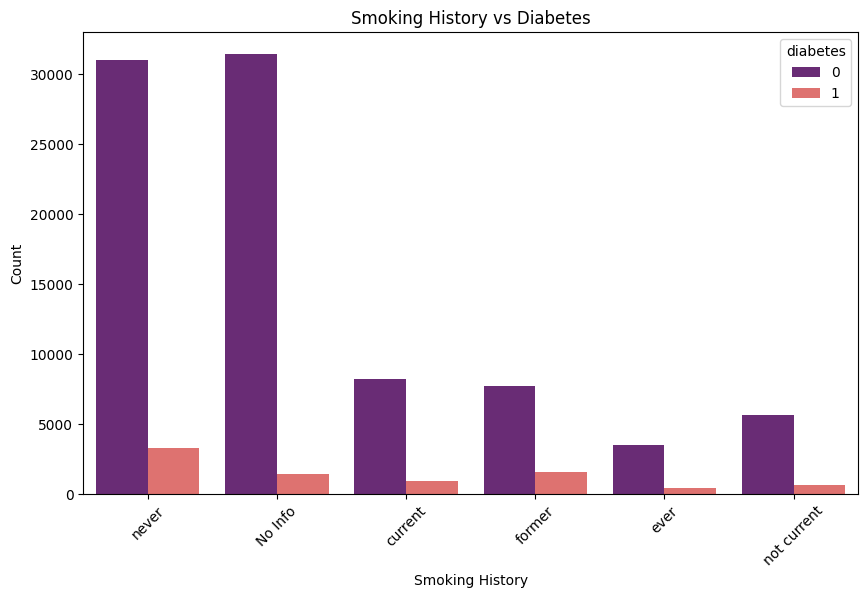

In [ ]:
# Bar plot of Smoking History vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x=df["smoking_history"], hue=df["diabetes"], palette="magma")
plt.title("Smoking History vs Diabetes")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


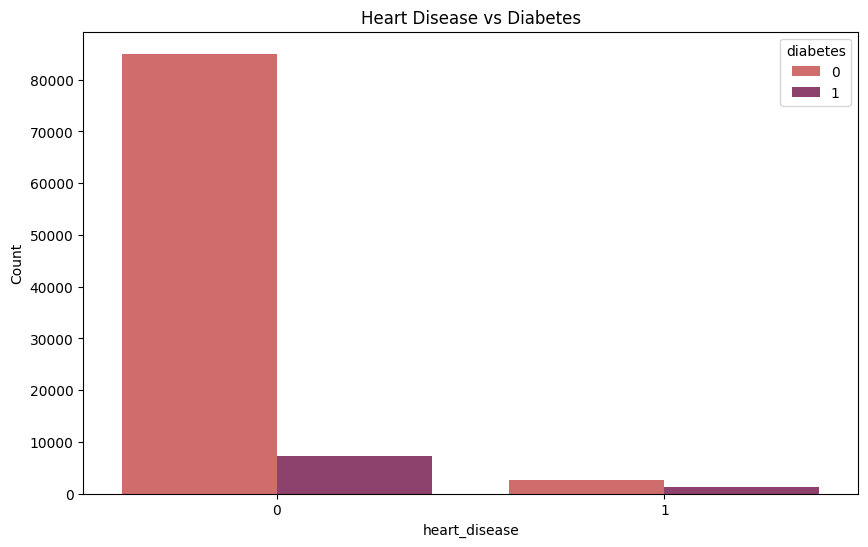

In [ ]:
#Countplot of Heart Disease vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="heart_disease", hue="diabetes", palette="flare")
plt.title("Heart Disease vs Diabetes")
plt.ylabel("Count")
plt.grid(False)
plt.show()


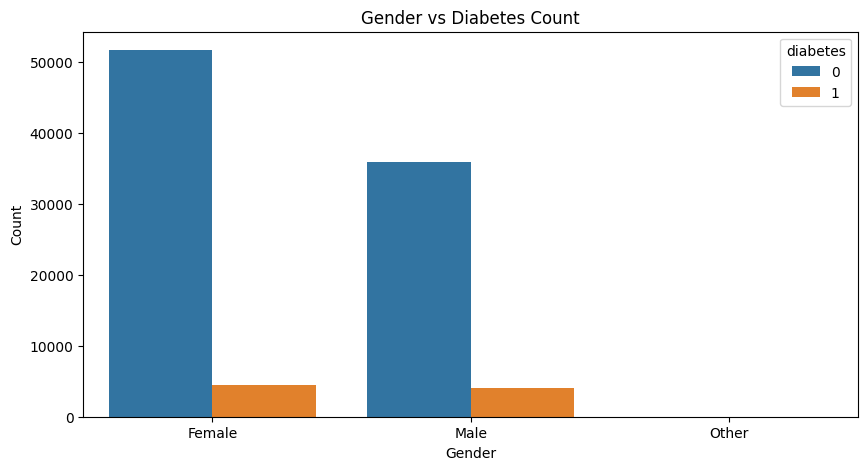

In [ ]:
#Count plot of Gender vs Diabetes Count

plt.figure(figsize=(10, 5))
sns.countplot(x="gender", hue="diabetes", data=df)
plt.title("Gender vs Diabetes Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(False)
plt.show()


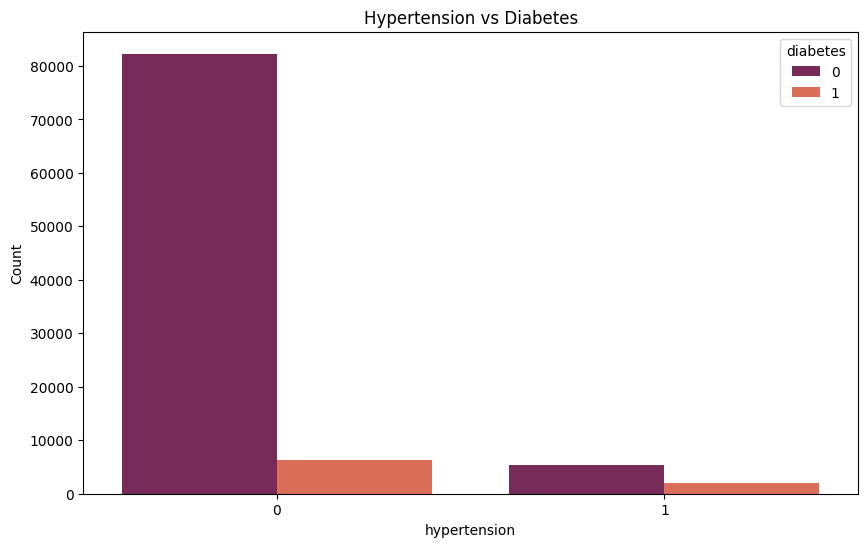

In [ ]:
# Count plot of Hypertension vs Diabetes

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="hypertension", hue="diabetes", palette="rocket")
plt.title("Hypertension vs Diabetes")
plt.ylabel("Count")
plt.grid(False)
plt.show()


<ipython-input-20-9594d854534c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="diabetes", y="bmi", data=df, palette="coolwarm")


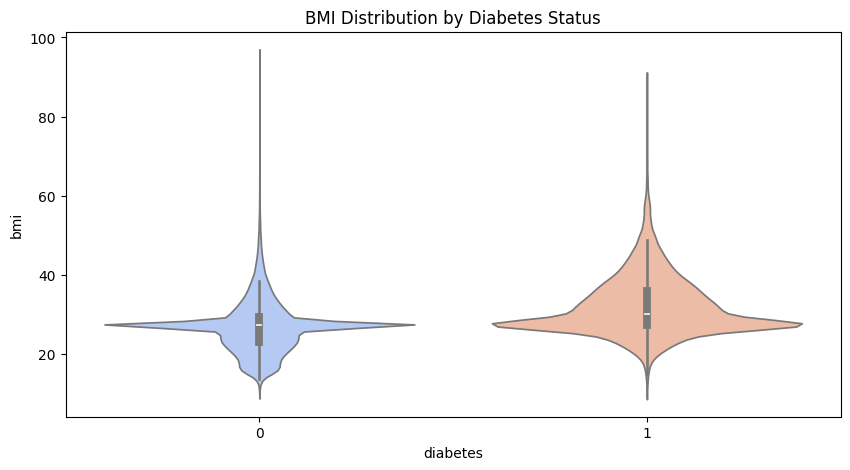

In [ ]:
#Violin plot of BMI Distribution by Diabetes Status

plt.figure(figsize=(10, 5))
sns.violinplot(x="diabetes", y="bmi", data=df, palette="coolwarm")
plt.title("BMI Distribution by Diabetes Status")
plt.grid(False)
plt.show()


<ipython-input-21-fbdd95f020f3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="age", y="blood_glucose_level", data=df, marker="o", ci=None, color="blue")


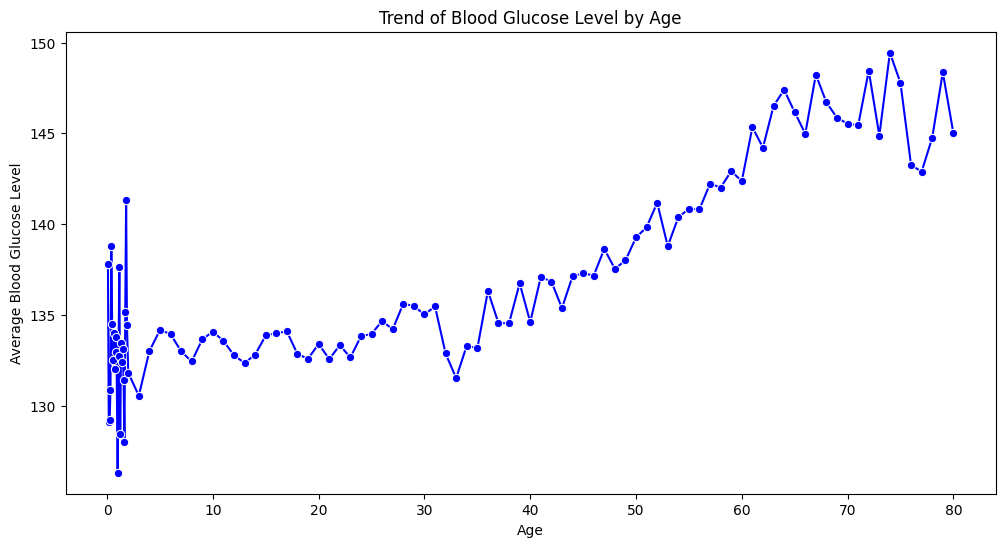

In [ ]:
#Line plot of Average Blood Glucose Level

plt.figure(figsize=(12, 6))
sns.lineplot(x="age", y="blood_glucose_level", data=df, marker="o", ci=None, color="blue")
plt.title("Trend of Blood Glucose Level by Age")
plt.xlabel("Age")
plt.ylabel("Average Blood Glucose Level")
plt.show()


<ipython-input-22-f43280294ede>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diabetes"] == 1]["blood_glucose_level"], label="Diabetes", shade=True, color="red")
<ipython-input-22-f43280294ede>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diabetes"] == 0]["blood_glucose_level"], label="No Diabetes", shade=True, color="blue")


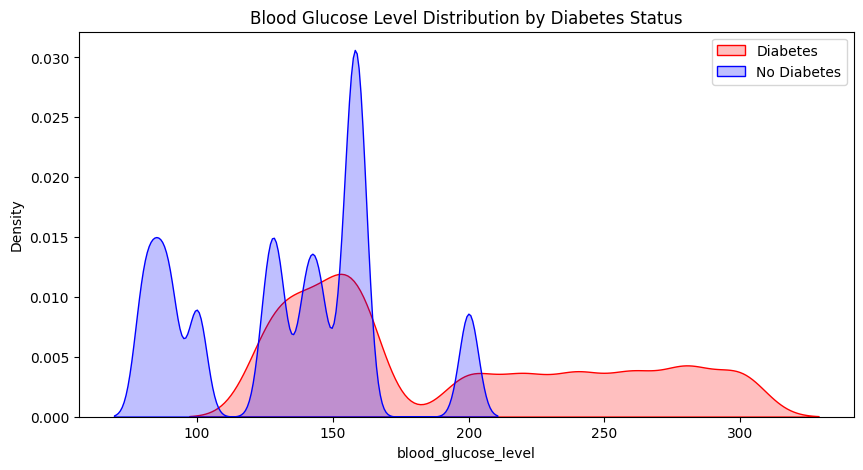

In [ ]:
#Kde plot of Blood Glucose Level Distribution by Diabetes Status

plt.figure(figsize=(10, 5))
sns.kdeplot(df[df["diabetes"] == 1]["blood_glucose_level"], label="Diabetes", shade=True, color="red")
sns.kdeplot(df[df["diabetes"] == 0]["blood_glucose_level"], label="No Diabetes", shade=True, color="blue")
plt.title("Blood Glucose Level Distribution by Diabetes Status")
# plt.grid(False)
plt.legend()
plt.show()


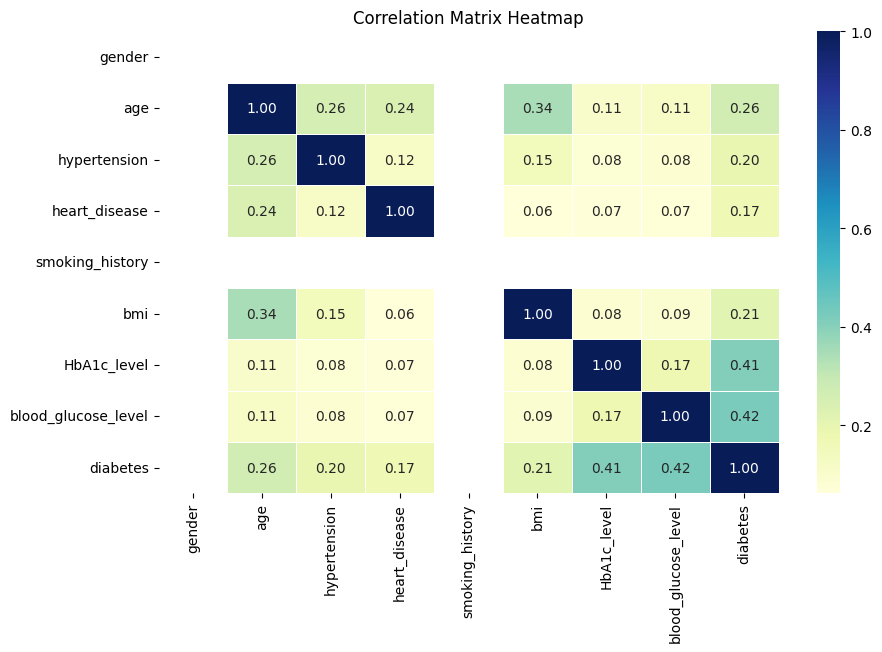

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Convert 'gender' column to numeric if it's not already
if df['gender'].dtype == object:  # Check if the column is of object type (string)
    df['gender'] = pd.to_numeric(df['gender'], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
    # If you want to replace with specific values instead of NaN:
    # df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Convert 'smoking_history' column to numeric if it's not already
if df['smoking_history'].dtype == object:  # Check if the column is of object type (string)
    df['smoking_history'] = pd.to_numeric(df['smoking_history'], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
    # If you want to replace with specific values instead of NaN:
    # df['smoking_history'] = df['smoking_history'].map({'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5})

# correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#Data Preparation

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,87664
1,8482


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["gender", "smoking_history"]

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df[categorical_cols].head()


,gender,smoking_history
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
#feature selection using chi-square

from sklearn.feature_selection import chi2

X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

# Calculate chi-squared statistics and p-values
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})

# Sort the features by chi-squared score in descending order
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)

# Display the feature scores
print(feature_scores)

# You can set a significance level (e.g., alpha = 0.05) and select features with p-values below the threshold
alpha = 0.05
selected_features = feature_scores[feature_scores['P-value'] < alpha]['Feature']


               Feature     Chi2 Score  P-value
7  blood_glucose_level  209621.053424      0.0
1                  age   81469.502229      0.0
5                  bmi    7445.740997      0.0
2         hypertension    3396.838356      0.0
6          HbA1c_level    3306.049048      0.0
3        heart_disease    2687.582087      0.0
0               gender            NaN      NaN
4      smoking_history            NaN      NaN


In [ ]:
#Splitting data

from sklearn.model_selection import train_test_split

X = df[selected_features]  # Features
y = df['diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (76916, 6)
y_train shape: (76916,)
X_test shape: (19230, 6)
y_test shape: (19230,)


# Model

In [ ]:
#Random forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9669786791471658
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.92      0.69      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.94      0.84      0.89     19230
weighted avg       0.97      0.97      0.96     19230



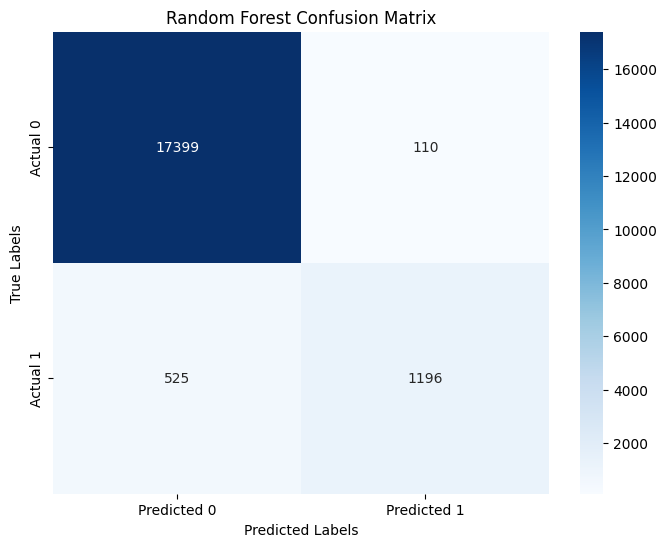

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluated the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Classification report
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.949869994799792
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.73      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



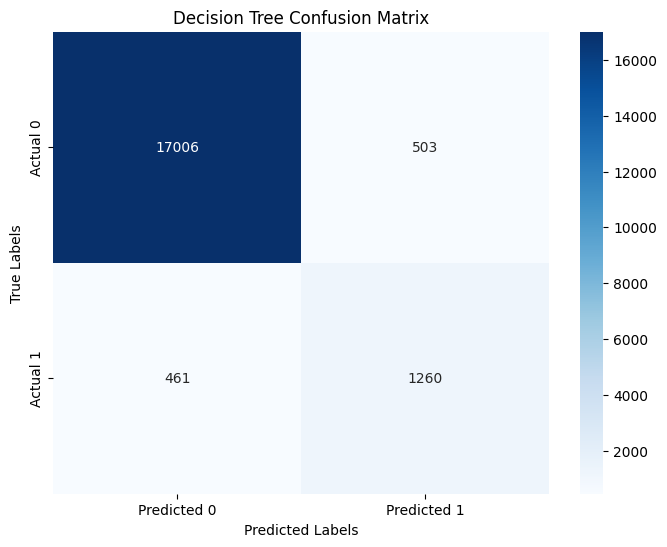

In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#Gradient boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

# Classification report
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9711908476339054
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



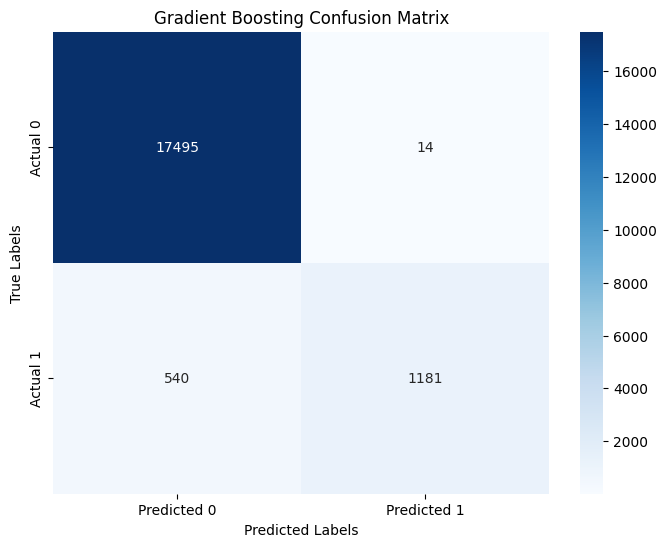

In [ ]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Classification report
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9533021320852834
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17509
           1       0.87      0.56      0.68      1721

    accuracy                           0.95     19230
   macro avg       0.92      0.78      0.83     19230
weighted avg       0.95      0.95      0.95     19230



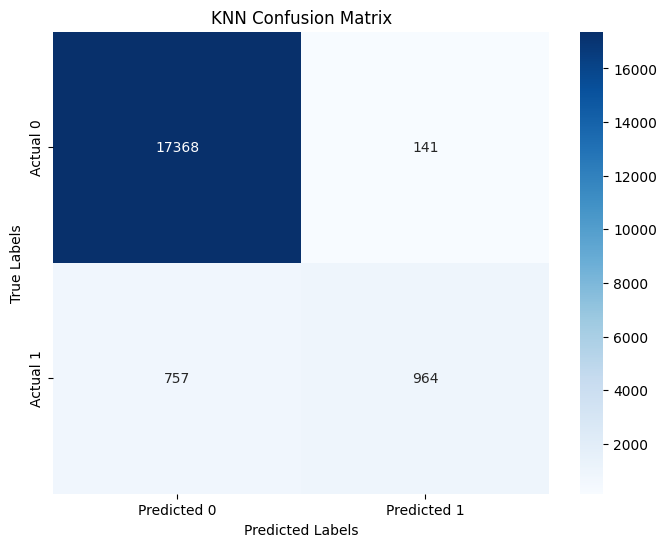

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

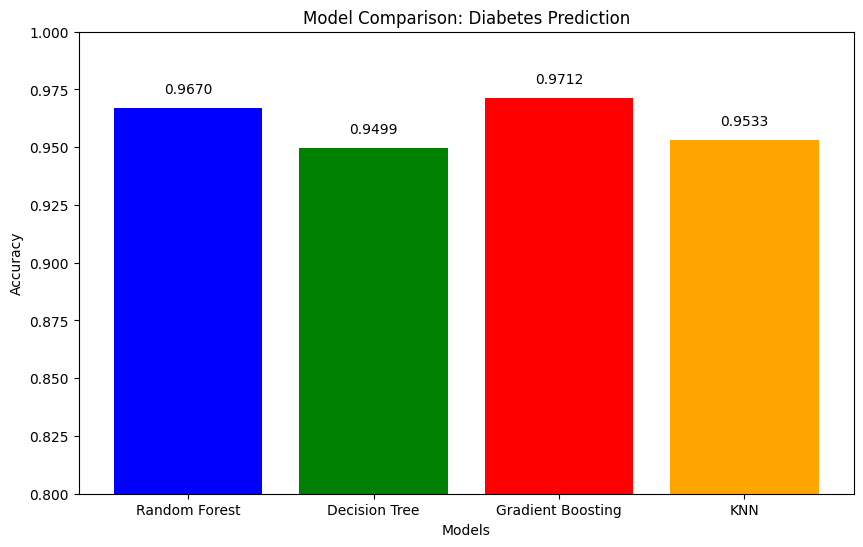

In [ ]:
# Model Comparison and Plotting

model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'KNN']
accuracies = [accuracy, accuracy_dt, accuracy_gb, accuracy_knn]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Diabetes Prediction")
plt.ylim([0.8, 1.0])  # Adjust y-axis limits as needed
# plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
  plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom')

plt.show()